# imports

In [ ]:
!pip install --upgrade scikit-learn # update sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

from xgboost import XGBClassifier
import xgboost as xgb

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, auc, classification_report

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

In [ ]:
print(sklearn.__version__)

1.2.0


# reading & preparing the data

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/courses/cs512-machine_learning/Homeworks/Homework3/Sensorless_drive_diagnosis.txt", sep=" ", header=None)

In [ ]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,-3.014600e-07,8.260300e-06,-0.000012,-0.000002,-1.438600e-06,-0.000021,0.031718,0.031710,0.031721,-0.032963,...,-0.63308,2.9646,8.1198,-1.4961,-1.4961,-1.4961,-1.4996,-1.4996,-1.4996,1
1,2.913200e-06,-5.247700e-06,0.000003,-0.000006,2.778900e-06,-0.000004,0.030804,0.030810,0.030806,-0.033520,...,-0.59314,7.6252,6.1690,-1.4967,-1.4967,-1.4967,-1.5005,-1.5005,-1.5005,1
2,-2.951700e-06,-3.184000e-06,-0.000016,-0.000001,-1.575300e-06,0.000017,0.032877,0.032880,0.032896,-0.029834,...,-0.63252,2.7784,5.3017,-1.4983,-1.4983,-1.4982,-1.4985,-1.4985,-1.4985,1
3,-1.322600e-06,8.820100e-06,-0.000016,-0.000005,-7.282900e-07,0.000004,0.029410,0.029401,0.029417,-0.030156,...,-0.62289,6.5534,6.2606,-1.4963,-1.4963,-1.4963,-1.4975,-1.4975,-1.4976,1
4,-6.836600e-08,5.666300e-07,-0.000026,-0.000006,-7.940600e-07,0.000013,0.030119,0.030119,0.030145,-0.031393,...,-0.63010,4.5155,9.5231,-1.4958,-1.4958,-1.4958,-1.4959,-1.4959,-1.4959,1


In [ ]:
dataset.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
dtype: int64

In [ ]:
dataset.columns = list(dataset.columns)[:-1] + ["y_true"]

In [ ]:
dataset.columns = [str(i).strip() for i in dataset.columns]

In [ ]:
dataset["y_true"].value_counts()

1     5319
2     5319
3     5319
4     5319
5     5319
6     5319
7     5319
8     5319
9     5319
10    5319
11    5319
Name: y_true, dtype: int64

In [ ]:
dataset["y_true"] = [i-1 for i in dataset["y_true"]]

In [ ]:
dataset["y_true"].value_counts()

0     5319
1     5319
2     5319
3     5319
4     5319
5     5319
6     5319
7     5319
8     5319
9     5319
10    5319
Name: y_true, dtype: int64

In [ ]:
X, y = dataset.drop("y_true", axis=1), dataset["y_true"]

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-3.014600e-07,8.260300e-06,-0.000012,-0.000002,-1.438600e-06,-0.000021,0.031718,0.031710,0.031721,-0.032963,...,6.0168,-0.63308,2.9646,8.1198,-1.4961,-1.4961,-1.4961,-1.4996,-1.4996,-1.4996
1,2.913200e-06,-5.247700e-06,0.000003,-0.000006,2.778900e-06,-0.000004,0.030804,0.030810,0.030806,-0.033520,...,3.6048,-0.59314,7.6252,6.1690,-1.4967,-1.4967,-1.4967,-1.5005,-1.5005,-1.5005
2,-2.951700e-06,-3.184000e-06,-0.000016,-0.000001,-1.575300e-06,0.000017,0.032877,0.032880,0.032896,-0.029834,...,5.8007,-0.63252,2.7784,5.3017,-1.4983,-1.4983,-1.4982,-1.4985,-1.4985,-1.4985
3,-1.322600e-06,8.820100e-06,-0.000016,-0.000005,-7.282900e-07,0.000004,0.029410,0.029401,0.029417,-0.030156,...,23.3960,-0.62289,6.5534,6.2606,-1.4963,-1.4963,-1.4963,-1.4975,-1.4975,-1.4976
4,-6.836600e-08,5.666300e-07,-0.000026,-0.000006,-7.940600e-07,0.000013,0.030119,0.030119,0.030145,-0.031393,...,5.0582,-0.63010,4.5155,9.5231,-1.4958,-1.4958,-1.4958,-1.4959,-1.4959,-1.4959


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y_true, dtype: int64

## train test split

In [ ]:
#train_ratio = 0.6
test_ratio = 0.2
val_ratio = 0.2

random_state = 42

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=test_ratio+val_ratio, random_state=random_state, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=random_state, stratify=y_test_val)

In [ ]:
y_train.value_counts()

0     3192
9     3192
10    3192
5     3192
8     3191
4     3191
1     3191
7     3191
2     3191
6     3191
3     3191
Name: y_true, dtype: int64

# hyperparameter search

## `learning_rate = 0.1` and list of `n_estimators = [10, 50, 100, 500]`

In [ ]:
list_n_estimators = [10, 50, 100, 500] # list of number of trees for hyperparameter search

evals = {} # an epmty dict to save evaluation results

for n_estimators in list_n_estimators:
  params = {"learning_rate": 0.1,
            "n_estimators": n_estimators,
            "objective": "multi:softprob",
            "tree_method": "gpu_hist", # training on gpu
            "num_class": 11,
            "seed": 42}

  xgboost_cl = XGBClassifier(**params) # initializing the xgboost classifier

  xgboost_cl.fit(X_train,
                 y_train,
                 verbose=1,
                 eval_set=[(X_val, y_val), (X_train, y_train)]) # training

  y_pred = xgboost_cl.predict_proba(X_val) # evaluation on validation data

  evals[n_estimators] = roc_auc_score(y_val.values,
                                      y_pred,
                                      average='micro',
                                      multi_class='ovr') # calculation of auc and saving in eval dictionary

[0]	validation_0-merror:0.176038	validation_1-merror:0.16764
[1]	validation_0-merror:0.173902	validation_1-merror:0.164934
[2]	validation_0-merror:0.164758	validation_1-merror:0.157641
[3]	validation_0-merror:0.159887	validation_1-merror:0.15334
[4]	validation_0-merror:0.154589	validation_1-merror:0.149153
[5]	validation_0-merror:0.156554	validation_1-merror:0.150719
[6]	validation_0-merror:0.153222	validation_1-merror:0.147985
[7]	validation_0-merror:0.151854	validation_1-merror:0.145421
[8]	validation_0-merror:0.149889	validation_1-merror:0.143712
[9]	validation_0-merror:0.150402	validation_1-merror:0.143883
[0]	validation_0-merror:0.176038	validation_1-merror:0.16764
[1]	validation_0-merror:0.173902	validation_1-merror:0.164934
[2]	validation_0-merror:0.164758	validation_1-merror:0.157641
[3]	validation_0-merror:0.159887	validation_1-merror:0.15334
[4]	validation_0-merror:0.154589	validation_1-merror:0.149153
[5]	validation_0-merror:0.156554	validation_1-merror:0.150719
[6]	validati

In [ ]:
evals

{10: 0.992212606334817,
 50: 0.99906883324077,
 100: 0.9998649055662202,
 500: 0.999991697630098}

In [ ]:
result_df = pd.DataFrame(evals.items(), columns=["n_classifiers", "micro_ovr_auc"])
result_df

,n_classifiers,micro_ovr_auc
0,10,0.992213
1,50,0.999069
2,100,0.999865
3,500,0.999992


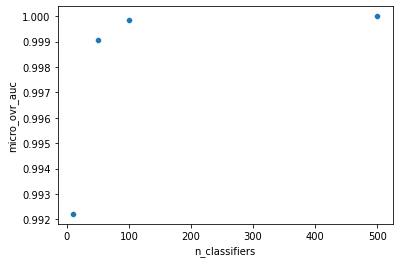

In [ ]:
sns.scatterplot(x="n_classifiers", y="micro_ovr_auc", data=result_df)

**best value of `n_estimators`:**

In [ ]:
best_n_estimators = max(evals, key=lambda k: evals[k])
best_n_estimators

500

##  `learning_rate = 0.1`, `n_estimators = 500` and list of `max_depth = [4, 6, 8]`

In [ ]:
list_max_depth = [4, 6, 8]

evals = {}

for max_depth in list_max_depth:
  params = {"learning_rate": 0.1,
            "n_estimators":best_n_estimators,
            "tree_method": "gpu_hist",
            "max_depth": max_depth,
            "objective": "multi:softprob",
            "num_class": 11,
            "seed": 42}


  xgboost_cl = XGBClassifier(**params)

  xgboost_cl.fit(X_train,
                 y_train,
                 verbose=1,
                 eval_set=[(X_val, y_val), (X_train, y_train)])

  y_pred = xgboost_cl.predict_proba(X_val)

  evals[max_depth] = roc_auc_score(y_val.values,
                                      y_pred,
                                      average="micro", # it throws error
                                      multi_class="ovr")

[0]	validation_0-merror:0.12938	validation_1-merror:0.122119
[1]	validation_0-merror:0.116561	validation_1-merror:0.106082
[2]	validation_0-merror:0.107161	validation_1-merror:0.097337
[3]	validation_0-merror:0.096479	validation_1-merror:0.088107
[4]	validation_0-merror:0.093317	validation_1-merror:0.083863
[5]	validation_0-merror:0.074261	validation_1-merror:0.065404
[6]	validation_0-merror:0.075286	validation_1-merror:0.066287
[7]	validation_0-merror:0.076483	validation_1-merror:0.066629
[8]	validation_0-merror:0.075115	validation_1-merror:0.066258
[9]	validation_0-merror:0.074175	validation_1-merror:0.065147
[10]	validation_0-merror:0.072894	validation_1-merror:0.062413
[11]	validation_0-merror:0.070928	validation_1-merror:0.061843
[12]	validation_0-merror:0.069988	validation_1-merror:0.061701
[13]	validation_0-merror:0.06751	validation_1-merror:0.059963
[14]	validation_0-merror:0.066741	validation_1-merror:0.058254
[15]	validation_0-merror:0.065288	validation_1-merror:0.057143
[16]

In [ ]:
evals

{4: 0.9999977310701658, 6: 0.9999983035970373, 8: 0.9999974966554646}

In [ ]:
result_df = pd.DataFrame(evals.items(), columns=["max_depth", "micro_ovr_auc"])
result_df

,max_depth,micro_ovr_auc
0,4,0.999998
1,6,0.999998
2,8,0.999997


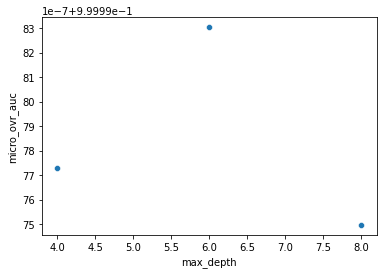

In [ ]:
sns.scatterplot(x="max_depth", y="micro_ovr_auc", data=result_df)

**best value of `max_depth`:**

In [ ]:
best_max_depth = max(evals, key=lambda k: evals[k])
best_max_depth

6

##  `max_depth = 6`, `n_estimators = 500` and list of  `learning_rate = [0.001, 0.01, 0.1]`

In [ ]:
list_learning_rate = [0.001, 0.01, 0.1]

evals = {}

for lr in list_learning_rate:
  params = {"learning_rate": lr,
            "n_estimators":best_n_estimators,
            "max_depth": best_max_depth,
            "objective": "multi:softprob",
            "tree_method": "gpu_hist",
            "num_class": 11,
            "seed": 42}


  xgboost_cl = XGBClassifier(**params)

  xgboost_cl.fit(X_train,
                 y_train,
                 verbose=1,
                 eval_set=[(X_val, y_val), (X_train, y_train)])

  y_pred = xgboost_cl.predict_proba(X_val)

  evals[lr] = roc_auc_score(y_val.values,
                                      y_pred,
                                      average='micro', # it throws error
                                      multi_class='ovr')

[0]	validation_0-merror:0.041702	validation_1-merror:0.033955
[1]	validation_0-merror:0.04119	validation_1-merror:0.033215
[2]	validation_0-merror:0.040933	validation_1-merror:0.032901
[3]	validation_0-merror:0.041104	validation_1-merror:0.032844
[4]	validation_0-merror:0.041104	validation_1-merror:0.032844
[5]	validation_0-merror:0.041275	validation_1-merror:0.033357
[6]	validation_0-merror:0.04136	validation_1-merror:0.033386
[7]	validation_0-merror:0.041104	validation_1-merror:0.033329
[8]	validation_0-merror:0.040506	validation_1-merror:0.032816
[9]	validation_0-merror:0.0423	validation_1-merror:0.033272
[10]	validation_0-merror:0.042215	validation_1-merror:0.033215
[11]	validation_0-merror:0.042728	validation_1-merror:0.033699
[12]	validation_0-merror:0.042215	validation_1-merror:0.033329
[13]	validation_0-merror:0.042899	validation_1-merror:0.033984
[14]	validation_0-merror:0.042813	validation_1-merror:0.033699
[15]	validation_0-merror:0.042899	validation_1-merror:0.03387
[16]	va

In [ ]:
evals

{0.001: 0.9986046227572245, 0.01: 0.9999189494739485, 0.1: 0.9999983035970373}

In [ ]:
result_df = pd.DataFrame(evals.items(), columns=["learning_rate", "micro_ovr_auc"])
result_df

,learning_rate,micro_ovr_auc
0,0.001,0.998605
1,0.010,0.999919
2,0.100,0.999998


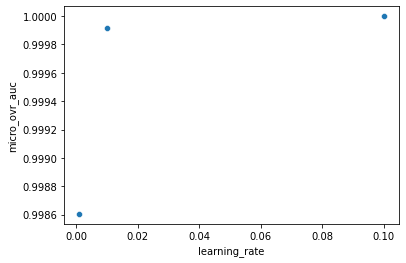

In [ ]:
sns.scatterplot(x="learning_rate", y="micro_ovr_auc", data=result_df)

**best value of `learning_rate`:**

In [ ]:
best_learning_rate = max(evals, key=lambda k: evals[k])
best_learning_rate

0.1

# final training

**best parameters:**

In [ ]:
print("best learning_rate:\t", best_learning_rate)
print("best n_estimators:\t", best_n_estimators)
print("best max_depth:\t\t", best_max_depth)

best learning_rate:	 0.1
best n_estimators:	 500
best max_depth:		 6


**merging validation and training datasets:**

In [ ]:
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

## final training

In [ ]:
params = {"learning_rate": best_learning_rate,
          "n_estimators":best_n_estimators,
          "max_depth": best_max_depth,
          "objective": "multi:softprob",
          "tree_method": "gpu_hist",
          "num_class": 11,
          "seed": 42}


xgboost_cl = XGBClassifier(**params)

xgboost_cl.fit(X_train_val,
                y_train_val,
                verbose=1,
                eval_set=[(X_train_val, y_train_val)]) # for monitoring train error

[0]	validation_0-merror:0.033905
[1]	validation_0-merror:0.029654
[2]	validation_0-merror:0.025082
[3]	validation_0-merror:0.023949
[4]	validation_0-merror:0.023244
[5]	validation_0-merror:0.020702
[6]	validation_0-merror:0.020446
[7]	validation_0-merror:0.019335
[8]	validation_0-merror:0.018352
[9]	validation_0-merror:0.018309
[10]	validation_0-merror:0.017177
[11]	validation_0-merror:0.017027
[12]	validation_0-merror:0.016386
[13]	validation_0-merror:0.016109
[14]	validation_0-merror:0.015831
[15]	validation_0-merror:0.015275
[16]	validation_0-merror:0.013994
[17]	validation_0-merror:0.013096
[18]	validation_0-merror:0.012562
[19]	validation_0-merror:0.011387
[20]	validation_0-merror:0.010832
[21]	validation_0-merror:0.010234
[22]	validation_0-merror:0.009593
[23]	validation_0-merror:0.009187
[24]	validation_0-merror:0.008952
[25]	validation_0-merror:0.008546
[26]	validation_0-merror:0.007841
[27]	validation_0-merror:0.007691
[28]	validation_0-merror:0.007413
[29]	validation_0-merror

XGBClassifier(max_depth=6, n_estimators=500, num_class=11,
              objective='multi:softprob', seed=42, tree_method='gpu_hist')

## final test

### calculation of auc score on test data

In [ ]:
y_pred = xgboost_cl.predict_proba(X_test)

auc_score = roc_auc_score(y_test.values,
                          y_pred,
                          average='micro',
                          multi_class='ovr')

print(f"AUC score of the final model on test data: {auc_score}")

AUC score of the final model on test data: 0.9999994041046847


### roc-auc curve

preparing one-hot representation of y_test for plotting roc-auc curve

In [ ]:
y_test_onehot = [[1 if i==y else 0 for i in range(params["num_class"])] for y in y_test]
y_test_onehot = np.asarray(y_test_onehot, dtype=np.float32)

In [ ]:
y_test_onehot[:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test.head()

11168    2
11392    2
1329     0
7177     1
27118    5
Name: y_true, dtype: int64

calculation of false-positive, true-positive rates and auc score:

In [ ]:
fp_rate = {}
tp_rate = {}
roc_auc_dict = {}

for i in range(11):
  fp_rate[i], tp_rate[i], _ = roc_curve(y_test_onehot[:,i], y_pred[:,i])
  roc_auc_dict[i] = auc(fp_rate[i], tp_rate[i])

### roc-auc curve (single plot)

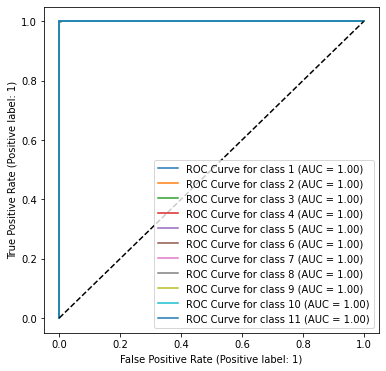

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
for cls in range(params["num_class"]):
  RocCurveDisplay.from_predictions(y_test_onehot[:,cls], y_pred[:,cls], name=f"ROC Curve for class {cls+1}", ax=ax)
plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.show()

### roc-auc curve (plot per class)

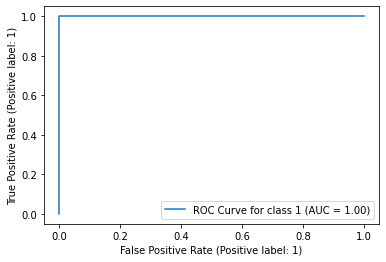

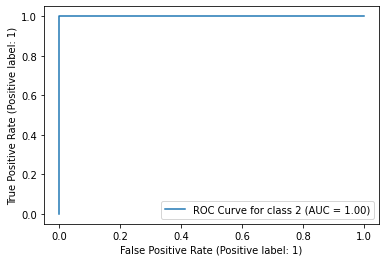

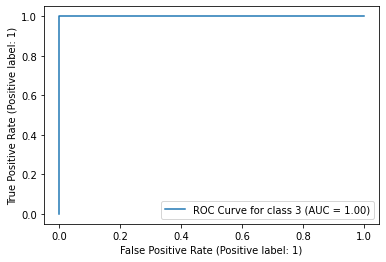

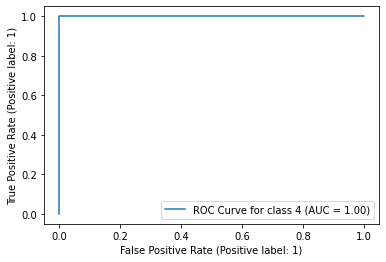

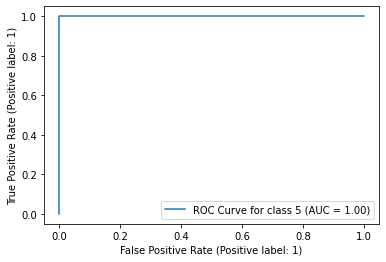

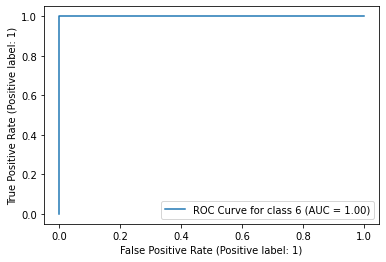

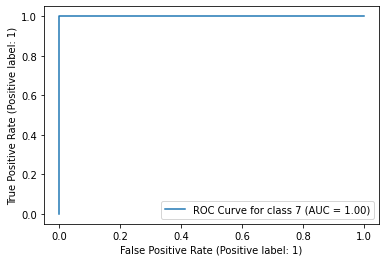

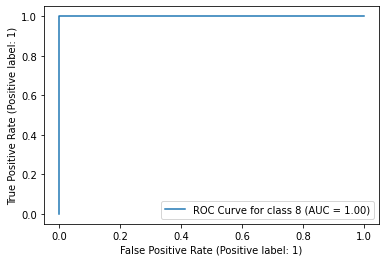

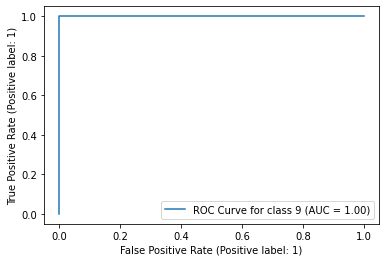

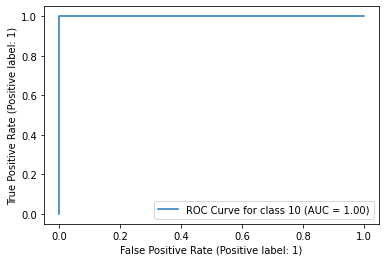

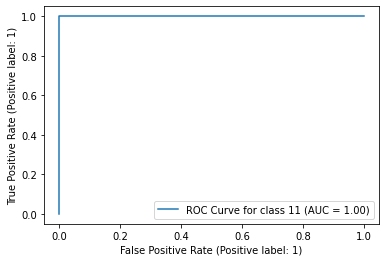

In [ ]:
for cls in range(params["num_class"]):
  RocCurveDisplay.from_predictions(y_test_onehot[:,cls], y_pred[:,cls], name=f"ROC Curve for class {cls+1}")

### classification report

In [ ]:
print(classification_report(y_test, [y.tolist().index(max(y)) for y in y_pred]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1063
           1       1.00      1.00      1.00      1064
           2       1.00      1.00      1.00      1064
           3       1.00      1.00      1.00      1064
           4       1.00      0.99      1.00      1064
           5       1.00      1.00      1.00      1064
           6       1.00      1.00      1.00      1064
           7       1.00      1.00      1.00      1064
           8       1.00      1.00      1.00      1064
           9       1.00      1.00      1.00      1063
          10       1.00      1.00      1.00      1064

    accuracy                           1.00     11702
   macro avg       1.00      1.00      1.00     11702
weighted avg       1.00      1.00      1.00     11702

